# Discrete least squares: the workhorse of function approximation

In this notebook we will study discrete least squares approximation. 

For more details, see Chapter 16 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Section 8.1 of

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Linear regression via `curve_fit`

A very powerful built-in function in Python is `curve_fit` from the `scipy.optimize` module.

In [109]:
from scipy import optimize 

n = 50 # number of data points 

x_data = np.random.rand(n)
noise = 0.1 * np.random.randn(n)
y_data = 2 * x_data + 1 + noise

def model(x,a0, a1):
    return a1 * x + a0

a_opt = optimize.curve_fit(model, xdata = x_data, ydata = y_data)[0]
print(a_opt)

[1.04226028 1.97289461]


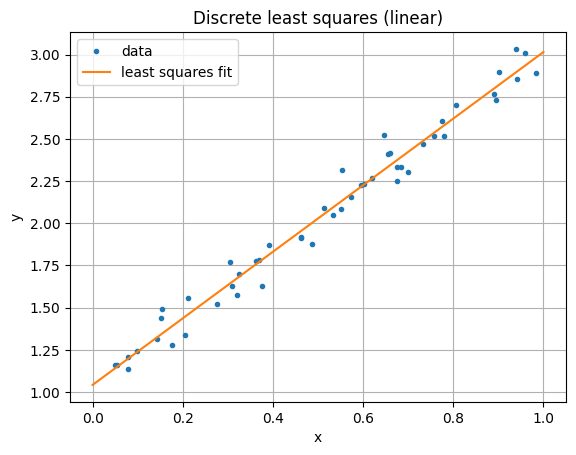

In [110]:
# visualize
x_grid = np.linspace(0,1,1000)

plt.plot(x_data, y_data, '.', label = 'data')
plt.plot(x_grid, model(x_grid, a_opt[0], a_opt[1]), label = 'least squares fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Discrete least squares (linear)')
plt.grid()
plt.show()

## Linear regression via `lstsq`

This is based on solving the system of normal equations.

In [121]:
A = np.vstack([np.ones(len(x_data)), x_data]).T # A matrix
b = y_data[:, np.newaxis] # convert y_data into column vector

a_opt_lstsq = np.linalg.lstsq(A, b, rcond = None)[0]
a_opt_lstsq

array([[1.04226028],
       [1.9728946 ]])

The coefficients $a_0$ and $a_1$ numerically coincide with those computed via `curve_fit`!

## Real-world example: change in sea level temperature

Let's test linear regression via discrete least squares on a climate change application. We consider the mean sea level change data since 1992. This data is taken from the website

https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries_global.php

and it is the result of an average between the measurements of the NASA satellites [TOPEX/Poseidon](https://eospso.nasa.gov/missions/topexposeidon), [Jason-1](https://www.jpl.nasa.gov/missions/jason-1), [Jason-2](https://www.jpl.nasa.gov/missions/jason-2), and [Jason-3](https://www.jpl.nasa.gov/missions/jason-3). It is collected in the file `data/sea_level.cvs`.

In order to import the csv dataset, we use the `pandas` module, very popular in data science applications.

[-6.12690918e+03  3.06311536e+00]


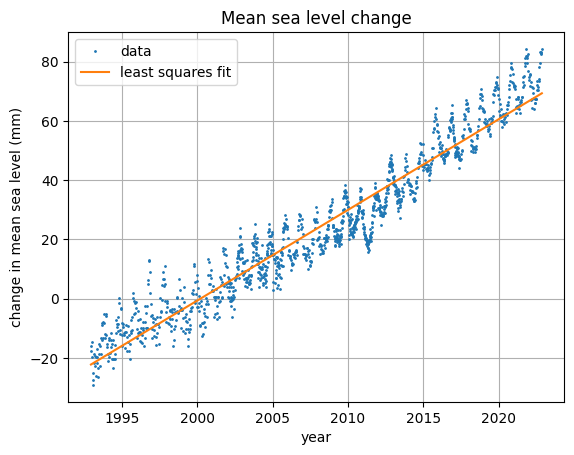

In [120]:
import pandas as pd

# import data 
data_frame_sea = pd.read_csv('data/sea_level.csv')
x_data_sea = data_frame['year']
y_data_sea = data_frame['mean change']

# perform discrete least squares
a_opt_sea = optimize.curve_fit(model, xdata = x_data_sea, ydata = y_data_sea)[0]
print(a_opt_sea)


# Visualize
x_grid_sea = np.linspace(np.min(x_data_sea), np.max(x_data_sea), 100)

plt.plot(x_data_sea, y_data_sea, '.', markersize = 2, label = 'data')
plt.plot(x_grid_sea, model(x_grid_sea, a_opt_sea[0], a_opt_sea[1]), label = 'least squares fit')
plt.xlabel('year')
plt.ylabel('change in mean sea level (mm)')
plt.legend()
plt.title('Mean sea level change')
plt.grid()
plt.show()

## Recommended problems

1. Log transformations
2. Try `curve_fit` with nonlinear models, such as polynomial regression. Replace the linear law in the first synthetic example with a quadratic or cubic law, plus noise.
3. Try to fit the sea level change data with a polynomial model (e.g., quadratic).